# Disney+ Movies and TV Shows clustering
Tarea realizada por: Rebeca Amor

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este ejercicio es un script de Python que carga un conjunto de datos en un marco de datos y realiza algunas operaciones de limpieza y transformaci√≥n de datos. Luego, utiliza t√©cnicas de an√°lisis de clusterizaci√≥n para agrupar los datos en cl√∫steres basados en sus caracter√≠sticas y muestra la cantidad √≥ptima de cl√∫steres utilizando diferentes m√©todos vistos en clase.

El conjunto de datos utilizado es un archivo CSV llamado "disney_plus_titles.csv". El c√≥digo utiliza la biblioteca pandas para cargar el archivo CSV en un marco de datos y realiza algunas operaciones de limpieza y transformaci√≥n de datos para que el archivo CSV sea m√°s f√°cil de trabajar.

Para construirlo, se ha aplicado la t√©cnica de an√°lisis de componentes principales (PCA) para reducir el n√∫mero de dimensiones de los datos, lo que facilita la agrupaci√≥n de los datos en cl√∫steres. Luego, utilizamos la t√©cnica de clusterizaci√≥n de K-Means para agrupar los datos en cl√∫steres. El c√≥digo utiliza la t√©cnica de "codo" (elbow) para determinar la cantidad √≥ptima de cl√∫steres. Finalmente, se muestra un gr√°fico que representa la cantidad de cl√∫steres en el eje X y la suma de las distancias cuadradas de los puntos de datos al centro del cl√∫ster m√°s cercano en el eje Y.

## An√°lisis y preparaci√≥n de los datos

Para empezar, el primer paso es importar las librer√≠as necesarias.

In [85]:
# Importaci√≥n de librer√≠as a utilizar
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import LogNorm
from sklearn.mixture import BayesianGaussianMixture

Los datos est√°n en formato CSV, para cargarlos en el entorno de Python utilizaremos la librer√≠a Pandas.

In [86]:
# Leemos y mostramos algunas columnas del dataset
disneyplus=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/disney_plus_titles.csv', index_col=0)
disneyplus.sample(20)

type                                title  \
show_id                                                 
s1029      Movie                      Magician Mickey   
s722       Movie                  Alice in Wonderland   
s1189      Movie                Sharks of Lost Island   
s478       Movie           X-Men: Days of Future Past   
s688       Movie                    One Day at Disney   
s442       Movie  Prince of Persia: The Sands of Time   
s1105      Movie        Newsies: The Broadway Musical   
s1014      Movie                           Lend a Paw   
s1181      Movie                         Science Fair   
s376       Movie     Prep & Landing: Naughty vs. Nice   
s157       Movie    Walking with Dinosaurs: The Movie   
s767       Movie                       Buffalo Dreams   
s1399      Movie                      Up, Up and Away   
s1083      Movie                            Minutemen   
s696     TV Show              Miles From Tomorrowland   
s635     TV Show             America's National Parks   
s309     TV Show                            Dinosaurs   
s537     TV Show                  Disney Prop Culture   
s411       Movie                        Morning Light   
s1445      Movie       Ice Age: Dawn Of The Dinosaurs   

                                                director  \
show_id                                                    
s1029                                         David Hand   
s722     Clyde Geronimi, Hamilton Luske, Wilfred Jackson   
s1189                                                NaN   
s478                                        Bryan Singer   
s688                                      Fritz Mitchell   
s442                                         Mike Newell   
s1105                       Jeff Calhoun, Brett Sullivan   
s1014                                     Clyde Geronimi   
s1181                 Cristina Costantini, Darren Foster   
s376                Kevin Deters, Stevie Wermers-Skelton   
s157                        Barry Cook, Neil Nightingale   
s767                                       David Jackson   
s1399                                    Robert Townsend   
s1083                                          Lev Spiro   
s696                                                 NaN   
s635                                                 NaN   
s309                                                 NaN   
s537                                                 NaN   
s411                                         Mark Monroe   
s1445                                    Carlos Saldanha   

                                                      cast  \
show_id                                                      
s1029             Pinto Colvig, Walt Disney, Clarence Nash   
s722     Ed Wynn, Richard Haydn, Sterling Holloway, Jer...   
s1189                                       Chris McLinden   
s478     Hugh Jackman, James McAvoy, Michael Fassbender...   
s688                                                   NaN   
s442     Jake Gyllenhaal, Ben Kingsley, Gemma Arterton,...   
s1105    Jeremy Jordan, Kara Lindsay, Ben Fankhauser, A...   
s1014                                                  NaN   
s1181    Anjali Chadha, Ryan Folz, Harsha Paladugu, Abr...   
s376     Dave Foley, Derek Richardson, Sarah Chalke, Ro...   
s157     John Leguizamo, Justin Long, Tiya Sircar, Skyl...   
s767     Reiley McClendon, Simon Baker, Graham Greene, ...   
s1399    Robert Townsend, Michael Pagan, Alex Datcher, ...   
s1083    Jason Dolley, Luke Benward, Nicholas Braun, Ch...   
s696     Olivia Munn, Cullen McCarthy, Fiona Bishop, De...   
s635                                           C.T. Taylor   
s309                                                   NaN   
s537                                        Daniel Lanigan   
s411                                     Patrick Warburton   
s1445    Ray Romano, John Leguizamo, Denis Leary, Simon...   

                                          country          date_added  

Una vez que tenemos los datos cargados en un DataFrame de Pandas, podemos comenzar a explorarlos y hacer las transformaciones necesarias para nuestro an√°lisis.

In [87]:
# Comprobamos los tipos de datos
disneyplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1447 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 135.9+ KB


Continuamos echando un vistazo a los valores nulos.

In [88]:
# Verificamos los valores nulos
disneyplus.isna().sum()

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [89]:
# Total de valores nulos
disneyplus.isna().sum().sum()

888

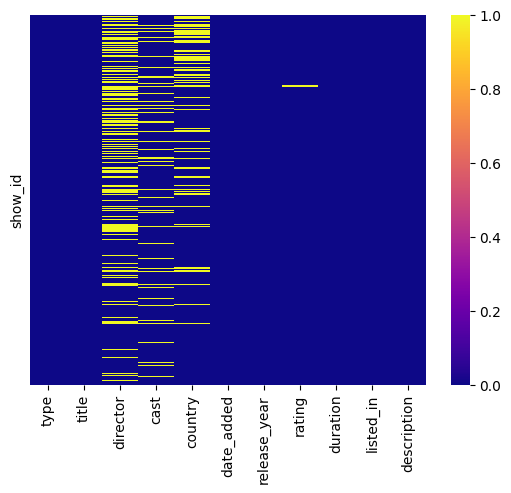

In [90]:
# Visualizamos los NaN como gr√°fica
sns.heatmap(disneyplus.isna(), yticklabels=False, cmap='plasma');

El siguiente paso es reemplazar los valores faltantes o "NaN" en la columna "rating" del DataFrame con el valor m√°s frecuente en esa columna.

El valor m√°s frecuente se almacena en la variable "r", y luego se utiliza el m√©todo "fillna()" de Pandas para reemplazar los valores faltantes.

In [91]:
# Reemplazamos los valores NaN en la columna de calificaci√≥n (previa copia del dataset original)
disney=disneyplus.copy()

r=disney['rating'].mode()[0]
disney['rating'].fillna(r,inplace=True)

disney.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1450 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 135.9+ KB


In [92]:
disney.isna().sum()

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [93]:
# üòà
disney.isna().sum().sum()

885

Ahora preparamos las columnas de 'duration' y 'director'.

Primero, se utiliza el m√©todo apply con una funci√≥n lambda para eliminar el texto innecesario de la columna 'duration', que contiene informaci√≥n sobre la duraci√≥n de las pel√≠culas y series en el formato 'X Seasons' o 'X min'. Despu√©s de eliminar el texto innecesario, se utiliza el m√©todo astype para convertir el tipo de datos de la columna 'duration' en un entero.

In [94]:
# Convertimos las temporadas y los minutos de la columna 'duration' (duraci√≥n) y convertimos la columna en int
disney['duration']=disney['duration'].apply(lambda x: x.replace(' min','').replace(' Seasons','').replace(' Season',''))
disney['duration']=disney['duration'].astype(int)

Luego, se utiliza un bucle for para iterar a trav√©s de cada fila en el dataframe. En cada iteraci√≥n, la cadena de la columna 'director' se divide en una lista utilizando el m√©todo split con ',' como separador.

A continuaci√≥n, se utiliza una comprensi√≥n de lista para eliminar los espacios en blanco adicionales de cada elemento en la lista resultante.

Finalmente, se utiliza el m√©todo explode para convertir cada elemento de la lista en una fila separada, replicando los valores de las otras columnas en cada fila nueva. Por √∫ltimo, se utiliza el m√©todo reset_index para reindexar las filas del dataframe de forma consecutiva, comenzando desde 0.

In [95]:
# Aqu√≠ preparamos la columna director
# En las columnas que haya m√°s de uno, los separamos
for index, row in disney.iterrows():
    directors=str(row['director']).split(',')
    directors=[director.strip() for director in directors]
    disney.at[index, 'director']=directors
disney=disney.explode('director')
disney.reset_index(drop=True, inplace=True)

Ahora, se eliminan las columnas 'cast', 'country' y 'description' del dataframe, ya que no son necesarias para el an√°lisis que se va a realizar. El par√°metro axis=1 especifica que las columnas deben ser eliminadas en lugar de las filas. El dataframe resultante se guarda en la variable clean_disney.

In [96]:
# Borramos columnas innecesarias para el an√°lisis
clean_disney=disney.drop(['cast','country','description'], axis=1)

In [97]:
# Comprobamos las columnas que quedaron
clean_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1594 non-null   object
 1   title         1594 non-null   object
 2   director      1594 non-null   object
 3   date_added    1591 non-null   object
 4   release_year  1594 non-null   int64 
 5   rating        1594 non-null   object
 6   duration      1594 non-null   int64 
 7   listed_in     1594 non-null   object
dtypes: int64(2), object(6)
memory usage: 99.8+ KB


A continuaci√≥n agrupamos la columna de "rating" est√° en cuatro categor√≠as: "Todos los p√∫blicos", "Adulto", "Joven" e "Infantil", dependiendo del valor de la calificaci√≥n de la pel√≠cula o serie.

In [98]:
# Agrupamos ahora la calificaci√≥n por edad
clean_disney['rating']=clean_disney['rating'].apply(lambda x: 'Todos los p√∫blicos' if x in ['TV-G', 'G'] else 'Adulto' if x in ['TV-PG', 'PG'] else 'Joven' if x in ['TV-14', 'PG-13'] else 'Infantil' if x in ['TV-Y', 'TV-Y7', 'TV-Y7-FV'] else 'Sin calificaci√≥n')

## Visualizaci√≥n

La visualizaci√≥n de datos es una parte fundamental del an√°lisis de datos y la ciencia de datos, ya que permite a los analistas y cient√≠ficos de datos identificar patrones, tendencias y relaciones ocultas en los datos que pueden no ser evidentes en un formato tabular o num√©rico. Adem√°s, la visualizaci√≥n de datos tambi√©n puede ser √∫til para identificar valores at√≠picos, errores y problemas en los datos.

El siguiente c√≥digo utiliza la librer√≠a de visualizaci√≥n de datos Seaborn para crear un gr√°fico de barras del n√∫mero de t√≠tulos por calificaci√≥n de edad. El eje X representa las diferentes calificaciones de edad y el eje Y muestra el n√∫mero de t√≠tulos correspondientes a cada calificaci√≥n. Se utiliza la funci√≥n countplot() de Seaborn para contar el n√∫mero de pel√≠culas en cada calificaci√≥n y representarlas en un gr√°fico de barras.

Adem√°s, se ordenan las calificaciones en el eje X de acuerdo al orden especificado en el par√°metro order y se agrega un t√≠tulo al gr√°fico utilizando la funci√≥n title() de Matplotlib. Finalmente, se muestra el gr√°fico utilizando la funci√≥n show() de Matplotlib.

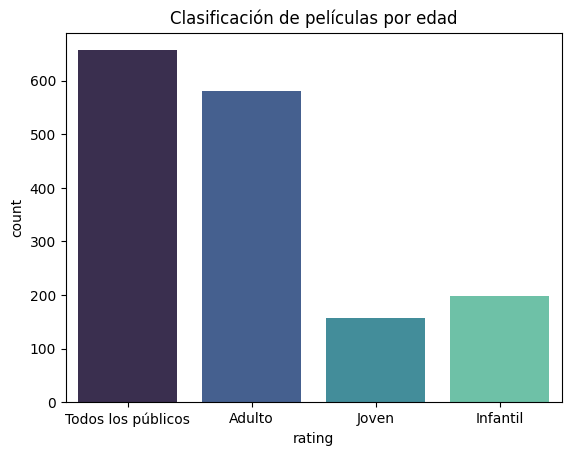

In [99]:
# Gr√°fico de n√∫mero de t√≠tulos por calificaci√≥n de edad
sns.countplot(x='rating', data=clean_disney, palette='mako',order=['Todos los p√∫blicos','Adulto','Joven','Infantil'])
plt.title('Clasificaci√≥n de pel√≠culas por edad')
plt.show()

En el siguiente gr√°fico de barras que muestra la cantidad de pel√≠culas y series en el dataset para cada una de las calificaciones de edad ('Todos los p√∫blicos', 'Adulto', 'Joven' e 'Infantil'). Adem√°s, utiliza la funci√≥n hue de seaborn para diferenciar entre pel√≠culas y series en el gr√°fico.

Es √∫til para tener una idea general de c√≥mo se distribuyen las pel√≠culas y series en t√©rminos de su clasificaci√≥n de edad y su tipo, lo que puede ser √∫til para realizar an√°lisis.

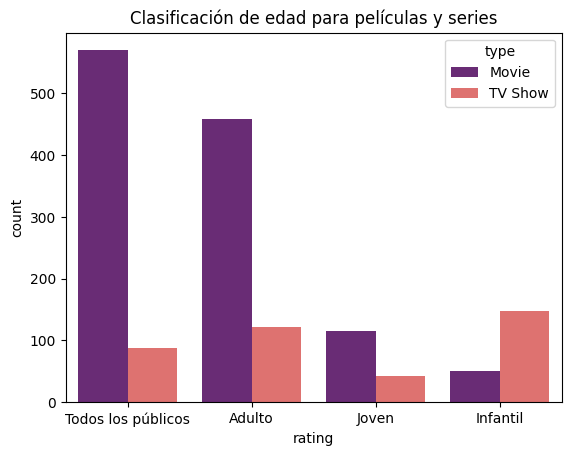

In [100]:
# Gr√°fico de pel√≠culas y series seg√∫n su calificaci√≥n de edad
sns.countplot(x='rating', data=clean_disney,hue='type', palette='magma',order=['Todos los p√∫blicos','Adulto','Joven','Infantil'])
plt.title('Clasificaci√≥n de edad para pel√≠culas y series')
plt.show()

Vamos a visualizar a continuaci√≥n unos gr√°ficos atendiendo a la duraci√≥n de las pel√≠culas y las series.
Para ello, ajustamos la duraci√≥n de las mismas.

Como primer paso agrupamos las pel√≠culas de Disney+ por a√±o de lanzamiento y se calcula la duraci√≥n media de las pel√≠culas en cada a√±o.

In [101]:
# Agrupamos las pel√≠culas por a√±o y le asociamos su duraci√≥n
clean_disney['type']=='Movie'
movies_df=clean_disney[clean_disney['type']=='Movie']
movies_df['duration'].astype(float)
movies_df_time=movies_df.groupby('release_year', as_index=False)['duration'].mean()
movies_df_time

release_year   duration
0           1928   8.000000
1           1932   7.666667
2           1933   8.666667
3           1934   8.750000
4           1935   9.800000
..           ...        ...
85          2017  77.923077
86          2018  84.315789
87          2019  62.797101
88          2020  66.725000
89          2021  49.545455

[90 rows x 2 columns]

Y aqu√≠ se hace lo mismo con las series.

In [102]:
# Agrupamos las series por su a√±o y le asociamos su duraci√≥n
clean_disney['type']=='TV Show'
series_df=clean_disney[clean_disney['type']=='TV Show']
series_df['duration'].astype(float)
series_df_time=series_df.groupby('release_year', as_index=False)['duration'].mean()
series_df_time

release_year   duration
0           1955   1.000000
1           1973   6.000000
2           1976   5.000000
3           1979   1.000000
4           1982   1.000000
5           1985   3.333333
6           1988   4.000000
7           1989  14.000000
8           1990   1.000000
9           1991   3.000000
10          1992   3.000000
11          1993   4.000000
12          1994   2.500000
13          1995   3.000000
14          1996   1.833333
15          1997   2.000000
16          1998   3.000000
17          1999   1.666667
18          2000   2.750000
19          2001   3.000000
20          2002   4.000000
21          2003   2.000000
22          2004   3.000000
23          2005   3.250000
24          2006   2.000000
25          2007   3.000000
26          2008   2.625000
27          2009   2.666667
28          2010   2.555556
29          2011   4.294118
30          2012   4.083333
31          2013   3.416667
32          2014   2.750000
33          2015   2.173913
34          2016   1.903226
35          2017   1.888889
36          2018   1.424242
37          2019   1.289474
38          2020   1.225000
39          2021   1.000000

In [103]:
# Comprobamos las columnas que tenemos
clean_disney.columns

Index(['type', 'title', 'director', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in'],
      dtype='object')

Gr√°fico que muestra la duraci√≥n promedio de las pel√≠culas de Disney en funci√≥n del a√±o de lanzamiento.

Text(0.5, 1.0, 'Duraci√≥n de pel√≠culas Disney de 1920 a 2021')

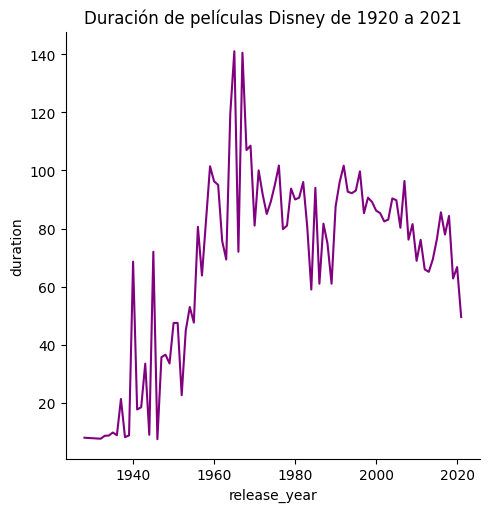

In [104]:
# Duraci√≥n de las pel√≠culas de Disney desde 1920
sns.relplot(data=movies_df_time, x="release_year", y="duration", kind="line", color="purple")
plt.title('Duraci√≥n de pel√≠culas Disney de 1920 a 2021')

Observamos que entre 1960 y 1970 tuvieron se lanzaron las pel√≠culas m√°s largas.

Gr√°fico que muestra la duraci√≥n promedio de las series de TV en funci√≥n del a√±o de lanzamiento.

Text(0.5, 1.0, 'Duraci√≥n de series Disney de 1920 a 2021')

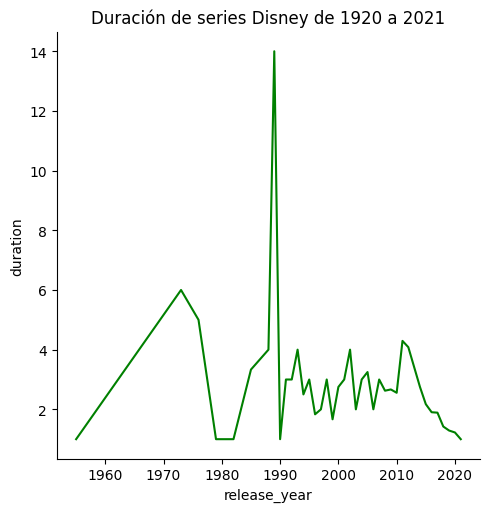

In [105]:
# Duraci√≥n de las series de Disney desde 1920
sns.relplot(data=series_df_time, x="release_year", y="duration", kind="line", color="green")
plt.title('Duraci√≥n de series Disney de 1920 a 2021')

La serie m√°s larga de Disney tuvo su lanzamiento en 1990.

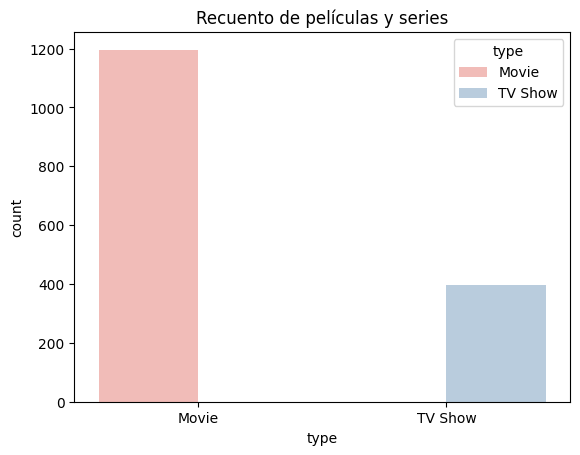

In [106]:
sns.countplot(x='type',data=disney,hue='type', palette='Pastel1',)
plt.title('Recuento de pel√≠culas y series')
plt.show()

Vemos que hay muchas m√°s pel√≠culas que series publicadas en la plataforma.

Ahora haremos una comparaci√≥n entre pel√≠culas y series seg√∫n su g√©nero.
Para ello creamos nuevas columnas booleanas para indicar si cada t√≠tulo incluye ciertos g√©neros, como comedia, ciencia ficci√≥n, romance, animaci√≥n, drama, musical y acci√≥n. Esto se hace usando la funci√≥n apply con una funci√≥n an√≥nima que busca cada g√©nero en la columna "listed_in" y devuelve un 1 si lo encuentra y un 0 si no.

In [107]:
clean_disney['Comedy']=clean_disney['listed_in'].apply(lambda x: 1 if 'comedy' in x.lower() else 0)
clean_disney['Science_Fiction']=clean_disney['listed_in']. apply(lambda x: 1 if 'science fiction' in x.lower() else 0)
clean_disney['Romance']=clean_disney['listed_in'].apply(lambda x: 1 if 'romance' in x.lower() else 0)
clean_disney['Animation']=clean_disney['listed_in'].apply(lambda x: 1 if 'animation' in x.lower() else 0)
clean_disney['Drama']=clean_disney['listed_in'].apply(lambda x: 1 if 'drama' in x.lower() else 0)
clean_disney['Musical']=clean_disney['listed_in'].apply(lambda x: 1 if 'musical' in x.lower() else 0)
clean_disney['Action']=clean_disney['listed_in'].apply(lambda x: 1 if 'action-adventure' in x.lower() else 0)
clean_disney.columns

Index(['type', 'title', 'director', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'Comedy', 'Science_Fiction', 'Romance',
       'Animation', 'Drama', 'Musical', 'Action'],
      dtype='object')

Este c√≥digo genera una figura que muestra la cantidad de pel√≠culas y programas de televisi√≥n de Disney+ por g√©nero. Para hacer esto, primero se define un DataFrame llamado comparison_df que se indexa por type (pel√≠cula o programa de televisi√≥n). Luego, se seleccionan las columnas del DataFrame que contienen informaci√≥n sobre los g√©neros, que son Comedy, Romance, Drama, Action, Musical, Animation y Science_Fiction. Se agrupa el DataFrame por type y se suman los valores de cada g√©nero para obtener la cantidad total de pel√≠culas y programas de televisi√≥n por g√©nero.

Despu√©s, se crea un nuevo DataFrame genre_df que combina las columnas type, Genre y Count. La columna type representa el tipo de contenido (pel√≠cula o programa de televisi√≥n), Genre representa los g√©neros de las pel√≠culas y programas de televisi√≥n y Count representa el n√∫mero de pel√≠culas y programas de televisi√≥n que se ajustan a cada g√©nero.

Por √∫ltimo, se utiliza sns.catplot para crear un gr√°fico de barras con la informaci√≥n de genre_df. El eje y representa los g√©neros, el eje x representa la cantidad de pel√≠culas y programas de televisi√≥n, y se utiliza el par√°metro hue para diferenciar entre pel√≠culas y programas de televisi√≥n. La funci√≥n plt.title se utiliza para agregar un t√≠tulo al gr√°fico.

<ipython-input-108-49082a917687>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre=comparison_df.groupby('type')['Comedy','Romance','Drama','Action','Musical','Animation','Science_Fiction'].sum().reset_index()


<Figure size 2000x1000 with 0 Axes>

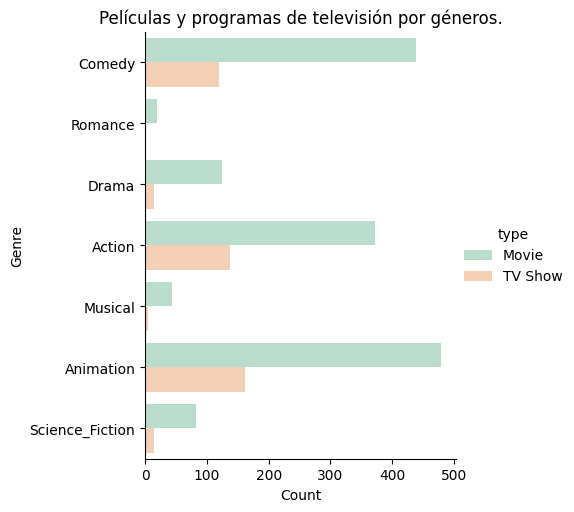

In [108]:
plt.figure(figsize=(20,10))
comparison_df=clean_disney.set_index('type')
comparison_df.iloc[:,9:15]
genre=comparison_df.groupby('type')['Comedy','Romance','Drama','Action','Musical','Animation','Science_Fiction'].sum().reset_index()
genre_df=genre.melt(id_vars='type',value_vars=['Comedy','Romance','Drama','Action','Musical','Animation', 'Science_Fiction'],var_name='Genre', value_name='Count',ignore_index=False)
sns.catplot(data=genre_df, x='Count', y='Genre',hue='type',kind='bar',palette='Pastel2',height=5)
plt.title('Pel√≠culas y programas de televisi√≥n por g√©neros.')
#plt.xticks(rotation=45)
plt.show();

## Entrenamiento

El entrenamiento para encontrar cl√∫sters no implica el uso de datos etiquetados o predefinidos, sino que se basa √∫nicamente en la informaci√≥n contenida en los datos de pel√≠culas y series de Disney Plus, lo que permite descubrir patrones y relaciones de forma exploratoria y no supervisada.

### Tratamiento de las variables

En primer lugar, es necesario preparar los datos, seleccionando las variables relevantes para el an√°lisis y eliminando valores faltantes o inconsistentes.

In [109]:
clean_disney.columns

Index(['type', 'title', 'director', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'Comedy', 'Science_Fiction', 'Romance',
       'Animation', 'Drama', 'Musical', 'Action'],
      dtype='object')

Aqu√≠ toca convertir las columnas de texto en columnas de valores num√©ricos.

La funci√≥n str.get_dummies se utiliza para convertir columnas de texto como "title", "director", "type", "date_added", "rating" y "listed_in" en varias columnas booleanas que indican si cada t√≠tulo pertenece a una categor√≠a determinada. Despu√©s de cada transformaci√≥n, las nuevas columnas booleanas se concatenan con el conjunto de datos original y las columnas de texto originales se eliminan con la funci√≥n drop.

In [110]:
# Convertimos las columnas string
title=clean_disney['title'].str.get_dummies()
clean_disney=pd.concat([clean_disney, title], axis=1)
clean_disney=clean_disney.drop(['title'], axis=1)

dir=clean_disney['director'].str.get_dummies()
clean_disney=pd.concat([clean_disney, dir], axis=1)
clean_disney=clean_disney.drop(['director'], axis=1)

tp=clean_disney['type'].str.get_dummies()
clean_disney=pd.concat([clean_disney, tp], axis=1)
clean_disney=clean_disney.drop(['type'], axis=1)

date=clean_disney['date_added'].str.get_dummies()
clean_disney=pd.concat([clean_disney, date], axis=1)
clean_disney=clean_disney.drop(['date_added'], axis=1)

rat=clean_disney['rating'].str.get_dummies()
clean_disney=pd.concat([clean_disney, rat], axis=1)
clean_disney=clean_disney.drop(['rating'], axis=1)

listed=clean_disney['listed_in'].str.get_dummies(sep=', ')
clean_disney=pd.concat([clean_disney, listed], axis=1)
clean_disney=clean_disney.drop(['listed_in'], axis=1)

In [111]:
clean_disney.shape

(1594, 2312)

Una vez preparados los datos, comenzaremos por la b√∫squeda de cl√∫sters posibles que se pueden encontrar en el dataset preparado.

### PCA

Realizaremos un an√°lisis de componentes principales (PCA) para determinar el n√∫mero √≥ptimo de dimensiones que se deben usar para reducir la dimensionalidad del conjunto de datos.

In [112]:
# Buscamos el n√∫mero id√≥neo de dimensiones
pca=PCA()
pca.fit(clean_disney)
cumsum=np.cumsum(pca.explained_variance_ratio_)
dim=np.argmax(cumsum >= 0.95) + 1
dim

2

Este c√≥digo busca encontrar el n√∫mero √≥ptimo de dimensiones para reducir la dimensionalidad de clean_disney mientras se mantiene la mayor cantidad de informaci√≥n posible.

### KMeans

La t√©cnica K-means es un algoritmo de aprendizaje no supervisado utilizado para agrupar un conjunto de datos en k cl√∫steres. El algoritmo comienza con la selecci√≥n de k centroides aleatorios. Luego, cada punto de datos se asigna al centroide m√°s cercano, y se recalcula el centroide para cada cl√∫ster. Este proceso se repite hasta que no hay cambios en la asignaci√≥n de cl√∫steres o se alcanza un n√∫mero m√°ximo de iteraciones. La asignaci√≥n de cl√∫steres se realiza minimizando la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado. Al final del proceso, el algoritmo devuelve los centroides finales y las asignaciones de cl√∫ster para cada punto de datos. El objetivo de K-means es minimizar la distancia entre los puntos de datos y su centroide asignado.

Para poner esto en pr√°ctica, utilizaremos la t√©cnica del "codo" para determinar el n√∫mero √≥ptimo de cl√∫sters en un conjunto de datos. La t√©cnica del codo se basa en el principio de que al aumentar el n√∫mero de cl√∫sters, la suma de las distancias al cuadrado de cada muestra al centroide m√°s cercano tambi√©n aumentar√°.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

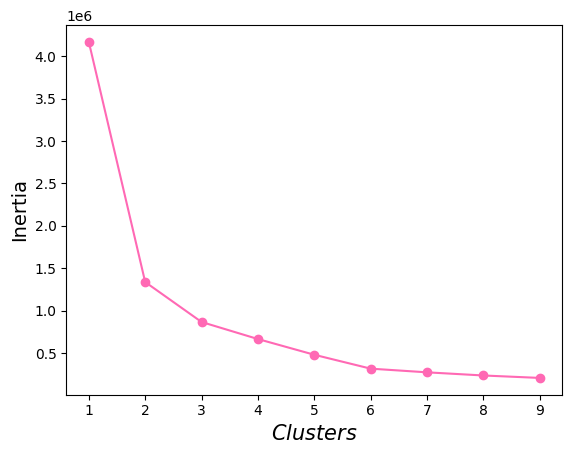

In [113]:
# Utilizamos la t√©cnica del "codo" (elbow) para encontrar el n√∫mero √≥ptimo de cl√∫sters
kmeans_k=[KMeans(n_clusters=k, random_state=42).fit(clean_disney) for k in range(1, 10)]
inertias=[model.inertia_ for model in kmeans_k]

plt.plot(range(1, 10), inertias, "bo-", color='hotpink')
plt.xlabel("$Clusters$", fontsize=15)
plt.ylabel("Inertia", fontsize=14)

En el gr√°fico del "codo" parece que el n√∫mero de cl√∫sters que nos indica con m√°s precisi√≥n son dos, coincidiendo con el resultado del PCA, ya que la l√≠nea cambia de direcci√≥n justo en ese n√∫mero. Pero si nos fijamos bien, vemos otros dos puntos de inflesi√≥n en cuatro y seis.

### Silhouette_score

Vamos a evaluar y representar gr√°ficamente el puntaje de la silueta para los diferentes valores de k (n√∫mero de clusters) hallados en el k-means ejecutado antes.

Un score alto indica que los objetos dentro de un cluster son muy similares entre s√≠ y muy diferentes de los objetos de otros clusters, lo que es deseable en una buena clusterizaci√≥n. En este caso, se est√°n evaluando los scores para el rango de 2 a 9 clusters.

<ipython-input-114-37cdf8032484>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2, 10), silhouette_scores, "bo-", color="purple")


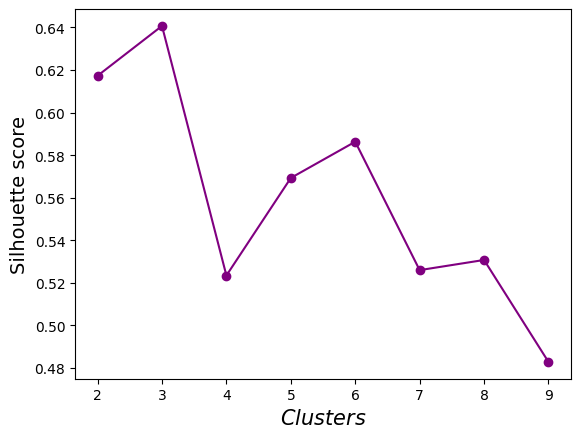

In [114]:
# Evaluamos la calidad de la clusterizaci√≥n que nos ha arrojado el modelo k-means
silhouette_scores=[silhouette_score(clean_disney, model.labels_) for model in kmeans_k[1:]]

plt.plot(range(2, 10), silhouette_scores, "bo-", color="purple")
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$Clusters$", fontsize=15)
plt.show()

En esta gr√°fica podemos ver que, a diferencia del 'elbow' anterior, sugiere tres cl√∫sters como el n√∫mero √≥ptimo.
Y parece encontrar otra agrupaci√≥n de seis, que es donde vemos otro pico en la representaci√≥n.
Con esta informaci√≥n presente, continuamos con el an√°lisis.

A continuaci√≥n se hace una clusterizaci√≥n y eval√∫a la calidad de la misma, y luego reduce la dimensi√≥n del conjunto de datos y visualiza los clusters obtenidos en un gr√°fico de dos dimensiones.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

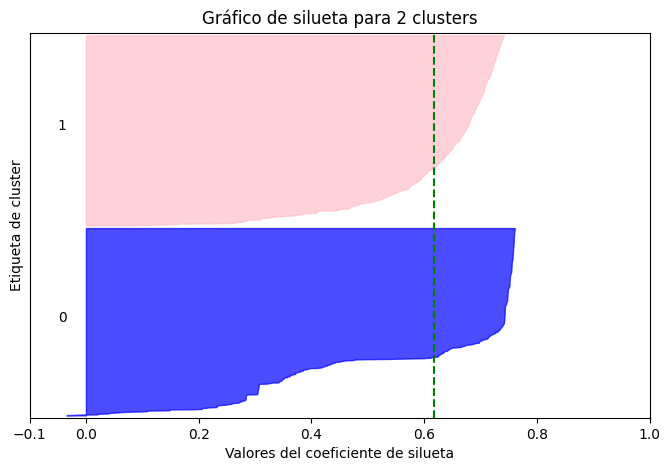

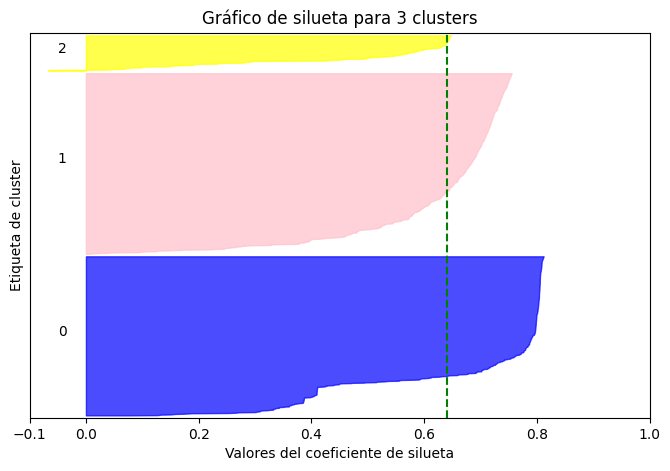

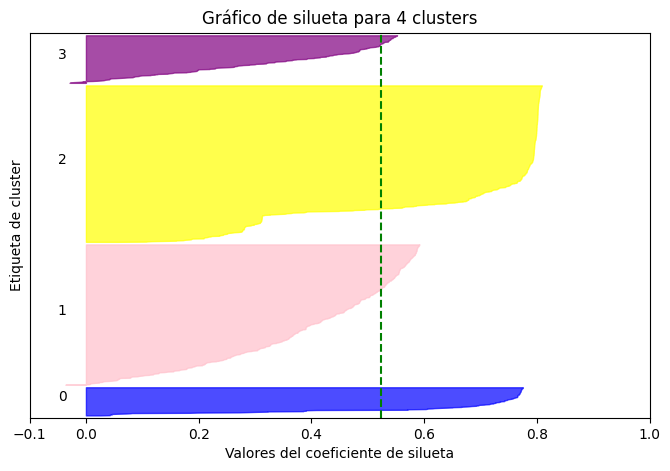

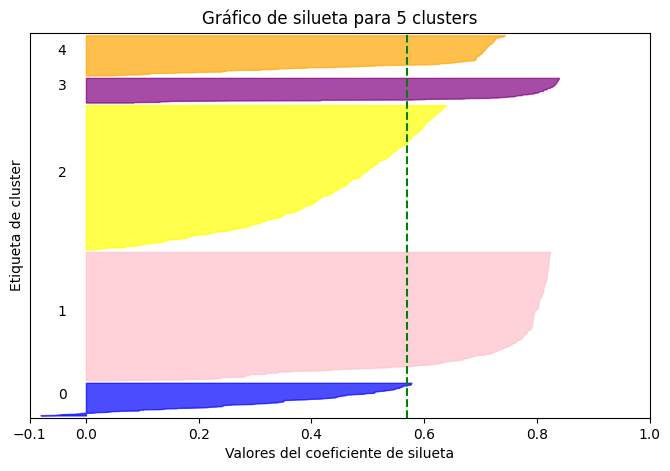

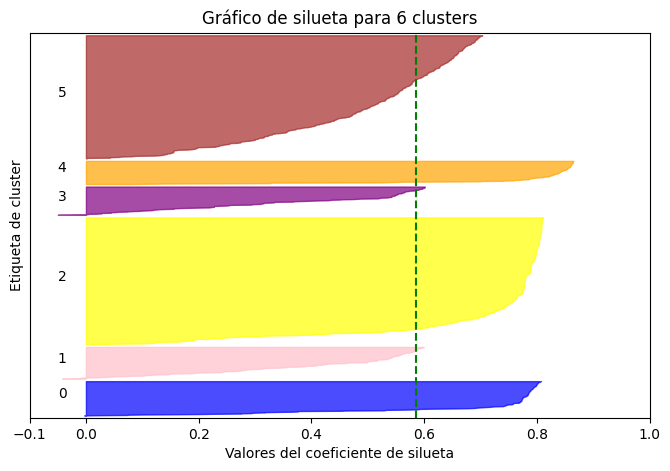

In [115]:
# Primero, se define el conjunto de datos de entrenamiento
# Luego, se utiliza un bucle para ajustar diferentes modelos de k-means con 2 a 6 clusters
# Y, por √∫ltimo, mostramos los resultados

training_dt=clean_disney
colors=['blue', 'pink', 'yellow', 'purple', 'orange', 'brown']
for j in range(2, 7):
    n_clusters=j
    km=KMeans(j, random_state=10)
    cluster_labels=km.fit_predict(training_dt)
    silhouette_avg=silhouette_score(training_dt, cluster_labels)
    sample_silhouette_values=silhouette_samples(training_dt, cluster_labels)
    fig, (ax1)=plt.subplots(1,1)
    fig.set_size_inches(8, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])
    y_lower=10

    for i in range(j):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=colors[i]
        #color=mpl.cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0 , ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        y_lower=y_upper+10
        ax1.set_title("Gr√°fico de silueta para {} clusters".format(i+1))
        ax1.set_xlabel("Valores del coeficiente de silueta")
        ax1.set_ylabel("Etiqueta de cluster")
    ax1.axvline(x=silhouette_avg, color="green", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### TSNE

A continuaci√≥n, aplicamos la t√©cnica de TSNE para descubrir patrones, relaciones y estructuras subyacentes que pueda haber en los datos.

t-SNE es una t√©cnica de reducci√≥n de dimensionalidad que permite visualizar datos en un espacio de menor dimensi√≥n de tal manera que se conserven las relaciones entre los datos.

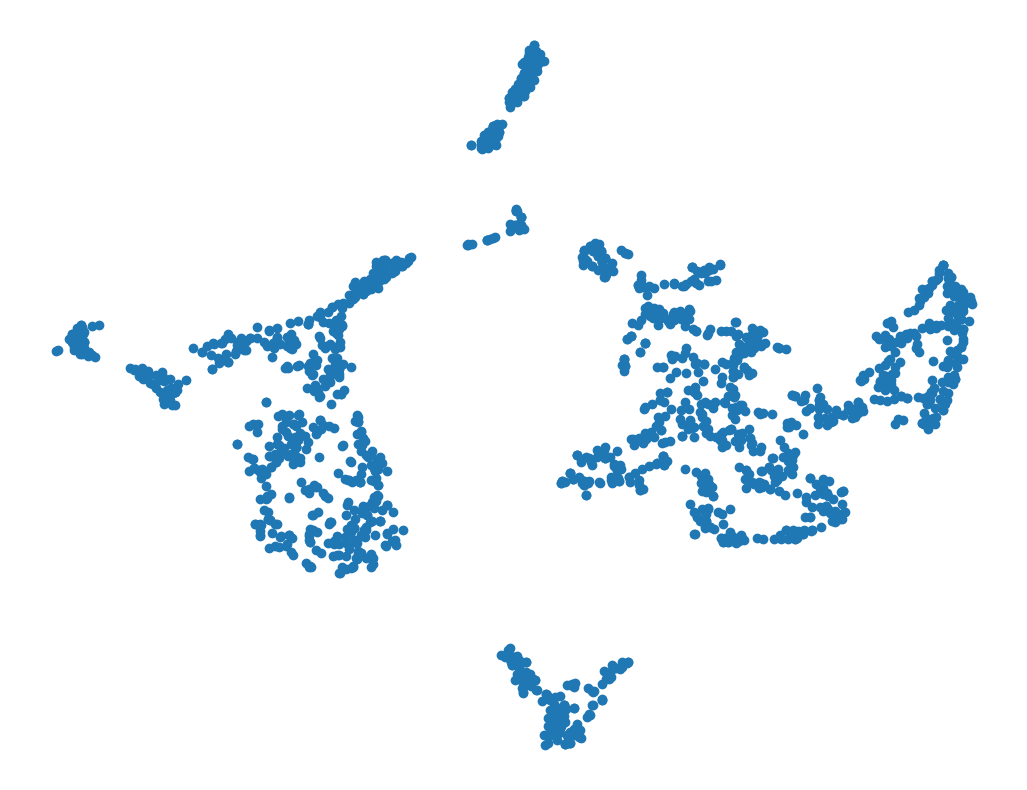

In [116]:
# Reducimos la dimensi√≥n manteniendo las relaciones entre los puntos y preservando la estructura
# y visualizamos la gr√°fica para observar el resultado
tsne=TSNE(n_components=2, random_state=42)
X_reduced=tsne.fit_transform(clean_disney)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.axis('off')
plt.show()

Por lo que parece, se distinguen cuatro grupos: dos grandes en el centro de la gr√°fica y otros dos m√°s peque√±os arriba y abajo.

### DBSCAN

Con DBSCAN comprobamos el resultado arrojado en el an√°lisis anterior.

La t√©cnica DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un m√©todo de clustering que se basa en la densidad de los puntos. En lugar de especificar el n√∫mero de cl√∫sters que se quieren, se define un radio y un n√∫mero m√≠nimo de puntos cercanos para que un punto sea considerado parte de un cl√∫ster. Los puntos que no cumplen con estas condiciones se consideran ruido.

In [117]:
# Definimos la funci√≥n
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask=np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_]=True
    anomalies_mask=dbscan.labels_==-1
    non_core_mask=~(core_mask | anomalies_mask)

    cores=dbscan.components_
    anomalies=X[anomalies_mask]
    non_cores=X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Pastel1")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="X", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

DBSCAN tiene como ventaja que puede identificar cl√∫sters de forma no lineal y no es sensible a la forma de los cl√∫sters. Adem√°s, es capaz de identificar puntos aislados que no pertenecen a ning√∫n cl√∫ster.

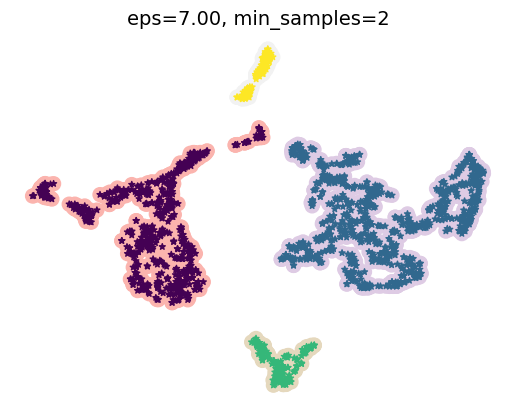

In [118]:
# Establecemos dos muestras como m√≠nimo porque es el dato que nos dio el PCA,
# pero podr√≠amos establecer tambi√©n tres y el resultado ser√≠a el mismo
dbscan=DBSCAN(eps=7, min_samples=2)
dbscan.fit(X_reduced)
plot_dbscan(dbscan, X_reduced, size=100)
plt.axis('off')
plt.show()

Y, efectivamente, se aprecian perfecatmente cuatro cl√∫sters bien diferenciados.

### KNN

Utilizaremos el m√©todo K-Nearest Neighbors para trazar las fronteras de decisi√≥n del modelo de clustering DBSCAN anterior que vimos.

In [119]:
# Definimos las funciones
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids=centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=False, show_xlabels=True, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx, yy=np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z=clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="cool")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

KNN utiliza la cercan√≠a de los puntos de datos para clasificar nuevos puntos en categor√≠as predefinidas.

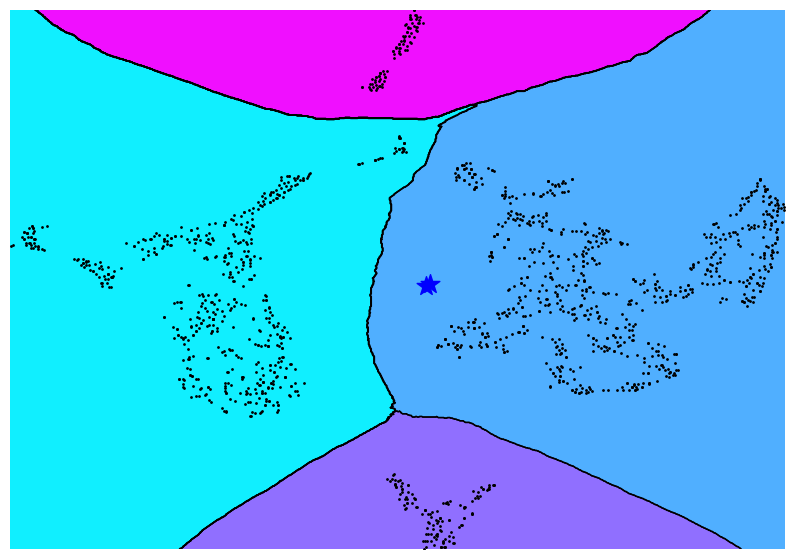

In [120]:
# Visualizamos los resultados
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_[:, :2], dbscan.labels_[dbscan.core_sample_indices_])
X_new=np.array([[-0.5, 0], [0, 0.5]])
plt.figure(figsize=(10, 7))
plot_decision_boundaries(knn, X_reduced, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="*", s=200, zorder=10)
plt.axis('off')
plt.show()

Con esto definitivamente confirmamos que obtenemos cuatro cl√∫sters.

### Gaussian Mixture

Usaremos la t√©cnica de Gaussian Mixture para identificar agrupaciones en datos basados en distribuciones de probabilidad.

In [121]:
# Definimos la funci√≥n
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx, yy=np.meshgrid(np.linspace(mins[0], maxs[0], resolution),np.linspace(mins[1], maxs[1], resolution))
    Z=-clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), cmap='winter')
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='purple')
    Z=clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='b');
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

El algoritmo comienza asignando un n√∫mero aleatorio de clusters y luego estima los par√°metros de las distribuciones gaussianas para cada uno de ellos. A continuaci√≥n, los datos se asignan a los clusters que mejor se ajustan a su distribuci√≥n, utilizando el teorema de Bayes para estimar la probabilidad de pertenecer a cada uno de los clusters.

Este proceso se repite varias veces hasta que se alcanza una convergencia en los par√°metros estimados de las distribuciones gaussianas y en la asignaci√≥n de los datos a los clusters correspondientes.

A diferencia del algoritmo de k-means, la t√©cnica de Gaussian Mixture permite la asignaci√≥n de probabilidades a cada punto de datos para pertenecer a cada uno de los clusters, lo que puede ser √∫til en algunas aplicaciones. Tambi√©n puede manejar clusters con formas complejas y superposiciones de datos, lo que lo hace adecuado para un amplio rango de problemas de clustering.

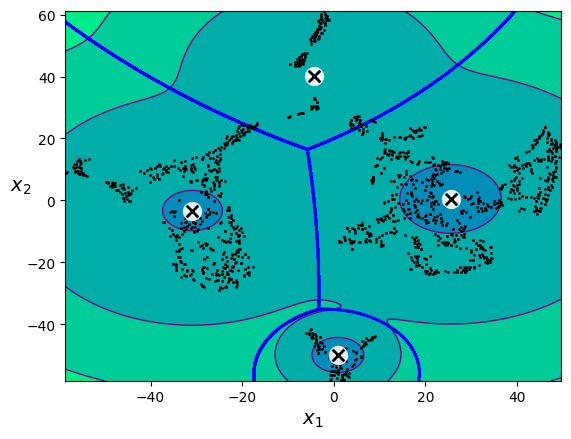

In [122]:
gm=GaussianMixture(n_components=4, n_init=100, covariance_type="spherical", random_state=42)
gm.fit(X_reduced)
plot_gaussian_mixture(gm, X_reduced)
plt.show()

### Bayesian Gaussian Mixture

Bayesian Gaussian Mixture utiliza un enfoque probabil√≠stico para determinar las mezclas √≥ptimas de estas distribuciones, lo que permite que los datos se agrupen de manera m√°s flexible que en otros algoritmos de clustering.

A diferencia de otros m√©todos de clustering, este enfoque permite que un punto de datos pertenezca a m√°s de un cl√∫ster, lo que refleja mejor la complejidad de la realidad.

Adem√°s, la t√©cnica utiliza el teorema de Bayes para calcular la probabilidad posterior de las mezclas, lo que permite que el modelo ajuste la complejidad del modelo a medida que se agregan nuevos datos.

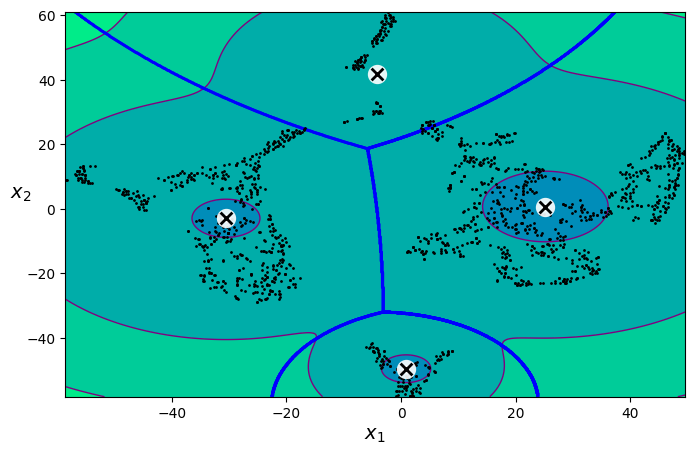

In [123]:
bgm=BayesianGaussianMixture(n_components=4, n_init=100, covariance_type = "spherical", random_state=42)
bgm.fit(X_reduced)
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_reduced)
plt.show()

Las dos t√©cnicas gaussianas arrojan pr√°cticamente el mismo resultado, localiz√°ndose en punto central en el mismo n√∫cleo del cl√∫ster.
Por lo que podemos concluir que, efectivamente, cuatro cl√∫sters parecen ser los m√°s acertados.

Esto puede ser una indicaci√≥n de que los datos tienen una estructura clara y que los par√°metros de la distribuci√≥n subyacente son relativamente robustos, independientemente de la elecci√≥n de una distribuci√≥n a priori espec√≠fica.

## Representaci√≥n final

Tras analizar las variables y probar varias representaciones con ellas, podemos llegar a la conclusi√≥n que los cl√∫sters corresponden a estas columnas: 'TV shows' (y su contrario 'Movie'), 'release_year', 'Documentary' y 'duration'.

<Figure size 1300x1000 with 0 Axes>

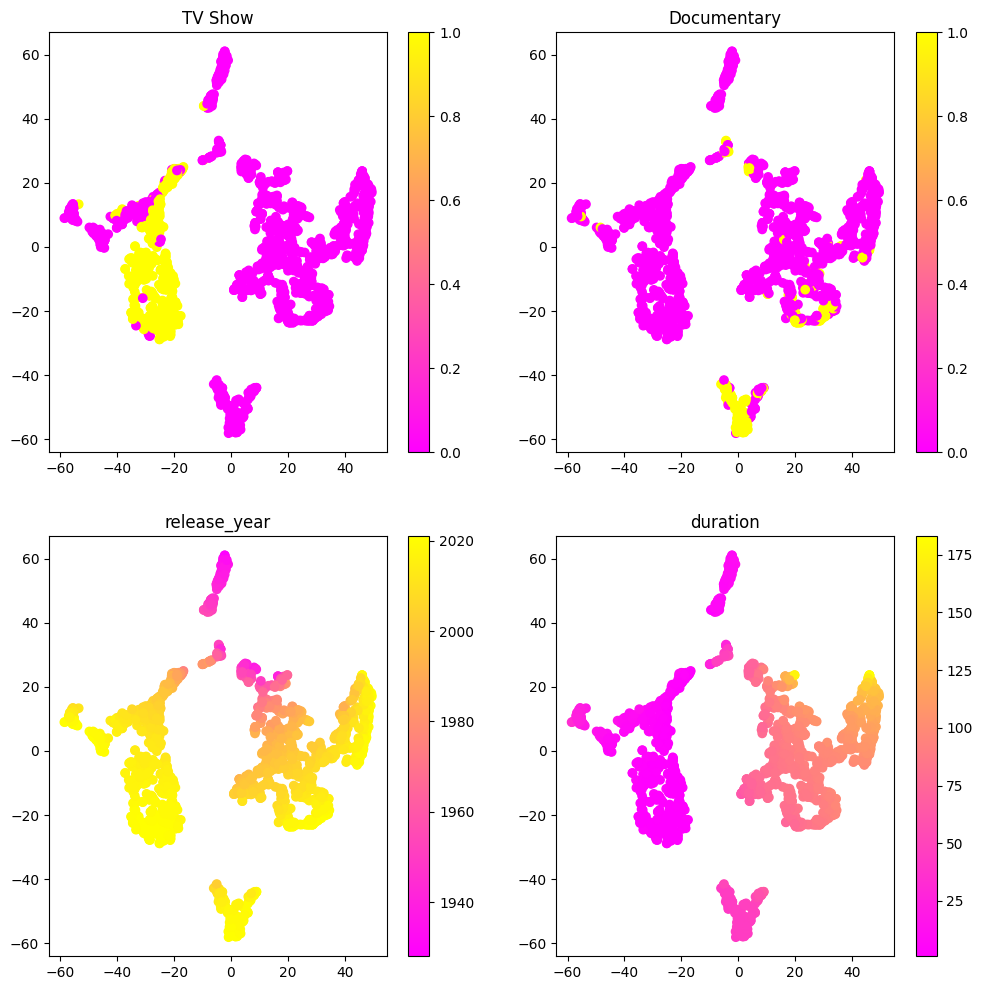

In [124]:
cluster_id=['TV Show','release_year','Documentary','duration']

plt.figure(figsize=(13,10))
fig, axes=plt.subplots(2,2, figsize=(12,12))
x,y=0,0

for i in cluster_id:
  scatter=axes[x,y].scatter(X_reduced[:, 0], X_reduced[:, 1], c=clean_disney[f'{i}'], cmap="spring")
  axes[x,y].set_title(f"{i}")
  fig.colorbar(scatter, ax=axes[x,y])
  x=x+1
  if x==2:
    x=0
    y=1

plt.show()

Podemos concluir que los cl√∫sters que mejor detecta son los correspondientes a los datos del tipo series (y, por consiguiente su contrario, pel√≠culas), documentales, duraci√≥n y a√±o de estreno.

Esto puede significar que los atributos seleccionados son los principales determinantes en la estructura de la base de datos.

Este tipo de estudios podr√≠a emplearse para analizar la distribuci√≥n del contenido de Disney Plus y entender mejor c√≥mo est√° organizado.

Por ejemplo, se podr√≠a hacer un an√°lisis de la cantidad de pel√≠culas en cada cluster y compararla con la cantidad de documentales, para entender mejor la estrategia de producci√≥n de Disney Plus.

Tambi√©n se podr√≠an realizar an√°lisis m√°s detallados en cada cluster, para identificar patrones o caracter√≠sticas comunes entre las pel√≠culas o documentales, y as√≠ obtener informaci√≥n valiosa para la toma de decisiones en cuanto a la producci√≥n o adquisici√≥n de contenido.